# Aim of the Notebook
The dataset thats being used in this notebook has been downloaded from [kaggle.com](https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement) Its a dataset that has Placement data of students in a XYZ campus. It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students

## Goals

There are couple of aims of this notebook first: since this is actually a homework asignment it will demonstrate basic understanding of data manipulation, data summarization and plotting using pandas matlab and plotting libraries. Secondly since my work includes training classification and regression models I will be showcasing how couple of different ML models can be deployed to make certain predictions. 


In [70]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys

# Some Quality of life things

NOT_SO_RANDOM_STATE_SINCE_EVERYONE_MAKES_IT_42 = 42
np.random.seed(NOT_SO_RANDOM_STATE_SINCE_EVERYONE_MAKES_IT_42)

print(f"Python version: {sys.version}")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Seaborn version: {sns.__version__}")


Python version: 3.11.10 (main, Oct  3 2024, 02:26:51) [Clang 14.0.6 ]
Pandas version: 2.2.3
NumPy version: 2.0.2
Seaborn version: 0.13.2


In [14]:
df = pd.read_csv('Placement_Data_Full_Class.csv', index_col=0) # we make the first column the index column since its the unique identifier for each person

# I will be renaming some of the columns so that they make more sense
df = df.rename(columns={
    'gender': 'Gender',
    'ssc_p': 'Secondary_Education_Percentage',
    'ssc_b': 'Board_of_Education_Secondary',
    'hsc_p': 'Higher_Secondary_Education_Percentage',
    'hsc_b': 'Board_of_Education_Higher_Secondary',
    'hsc_s': 'Specialization_in_Higher_Secondary',
    'degree_p': 'Degree_Percentage',
    'degree_t': 'Undergraduate_Degree',
    'workex': 'Work_Experience',
    'etest_p': 'Employability_Test_Percentage',
    'specialisation': 'Post_Graduation_Specialization',
    'mba_p': 'MBA_Percentage',
    'status': 'Placement_Status',
    'salary': 'Salary'
})

# Exploratory Data Analysis

from the info column we can see that only missing values are in the salary column. This makes sense since some of the students did not get a job offer yet ( there are 67 non placed students)

In [19]:
print(f"Shape of the DataFrame: {df.shape}")
display(df.head())

display(df.info())

display(df.describe())

# We can also describe the non numeric data but we have to use a different method
display(df.describe(include=['object']))

Shape of the DataFrame: (215, 14)


,Gender,Secondary_Education_Percentage,Board_of_Education_Secondary,Higher_Secondary_Education_Percentage,Board_of_Education_Higher_Secondary,Specialization_in_Higher_Secondary,Degree_Percentage,Undergraduate_Degree,Work_Experience,Employability_Test_Percentage,Post_Graduation_Specialization,MBA_Percentage,Placement_Status,Salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


<class 'pandas.core.frame.DataFrame'>
Index: 215 entries, 1 to 215
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 215 non-null    object 
 1   Secondary_Education_Percentage         215 non-null    float64
 2   Board_of_Education_Secondary           215 non-null    object 
 3   Higher_Secondary_Education_Percentage  215 non-null    float64
 4   Board_of_Education_Higher_Secondary    215 non-null    object 
 5   Specialization_in_Higher_Secondary     215 non-null    object 
 6   Degree_Percentage                      215 non-null    float64
 7   Undergraduate_Degree                   215 non-null    object 
 8   Work_Experience                        215 non-null    object 
 9   Employability_Test_Percentage          215 non-null    float64
 10  Post_Graduation_Specialization         215 non-null    object 
 11  MBA_Percent

None

,Secondary_Education_Percentage,Higher_Secondary_Education_Percentage,Degree_Percentage,Employability_Test_Percentage,MBA_Percentage,Salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


,Gender,Board_of_Education_Secondary,Board_of_Education_Higher_Secondary,Specialization_in_Higher_Secondary,Undergraduate_Degree,Work_Experience,Post_Graduation_Specialization,Placement_Status
count,215,215,215,215,215,215,215,215
unique,2,2,2,3,3,2,2,2
top,M,Central,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
freq,139,116,131,113,145,141,120,148


In [32]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print(" " * 6)

Value counts for Gender:
Gender
M    139
F     76
Name: count, dtype: int64
      
Value counts for Board_of_Education_Secondary:
Board_of_Education_Secondary
Central    116
Others      99
Name: count, dtype: int64
      
Value counts for Board_of_Education_Higher_Secondary:
Board_of_Education_Higher_Secondary
Others     131
Central     84
Name: count, dtype: int64
      
Value counts for Specialization_in_Higher_Secondary:
Specialization_in_Higher_Secondary
Commerce    113
Science      91
Arts         11
Name: count, dtype: int64
      
Value counts for Undergraduate_Degree:
Undergraduate_Degree
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: count, dtype: int64
      
Value counts for Work_Experience:
Work_Experience
No     141
Yes     74
Name: count, dtype: int64
      
Value counts for Post_Graduation_Specialization:
Post_Graduation_Specialization
Mkt&Fin    120
Mkt&HR      95
Name: count, dtype: int64
      
Value counts for Placement_Status:
Placement_Status
Placed      

## Plotting Categorical Variables

One of the things that I am interested is I want to see the gender distribution of these different categories I will be plotting these down below

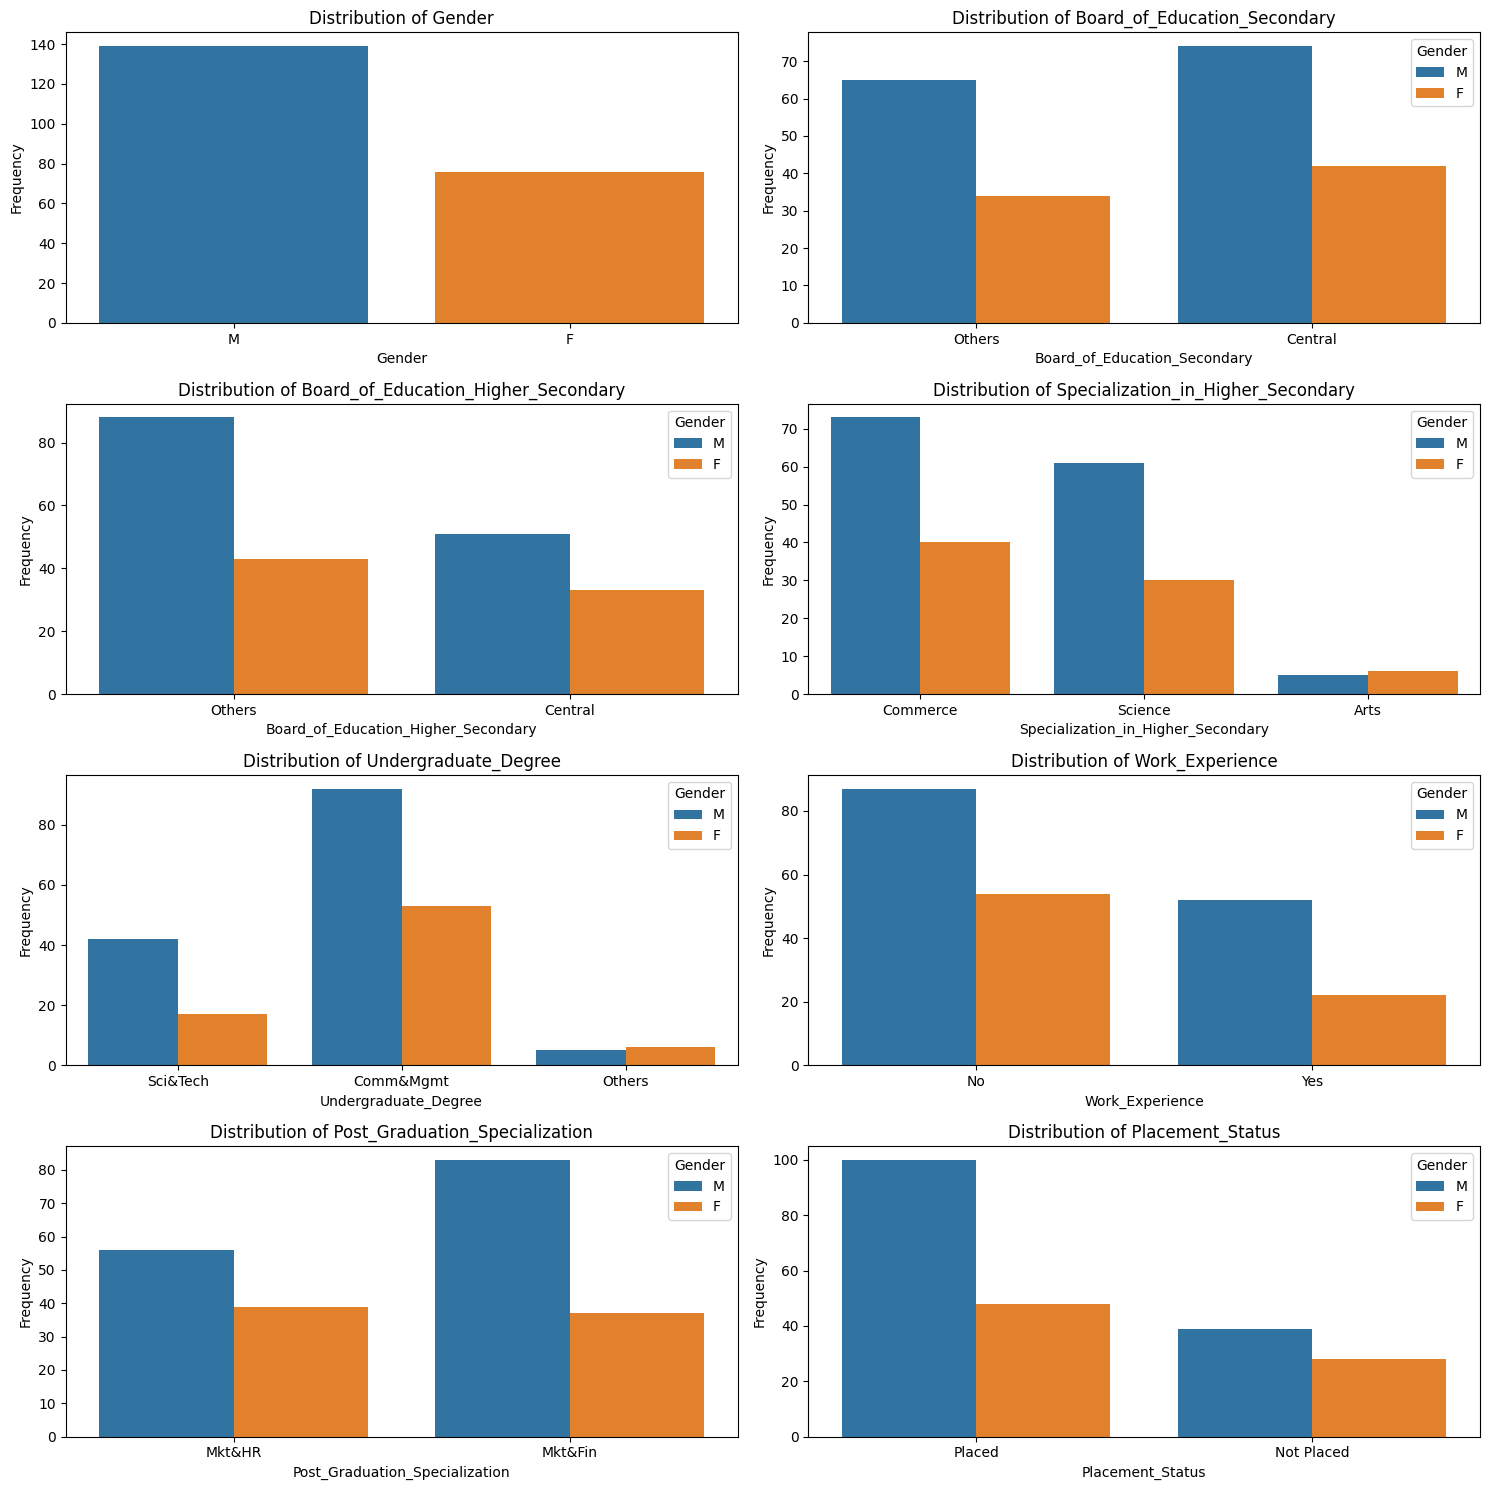

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

for ax, col in zip(axes.flatten(), df.select_dtypes(include=['object']).columns):
    sns.countplot(x=col, data=df, hue="Gender", ax=ax)
    ax.set_title(f"Distribution of {col}")
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

## Plotting Continous Variables

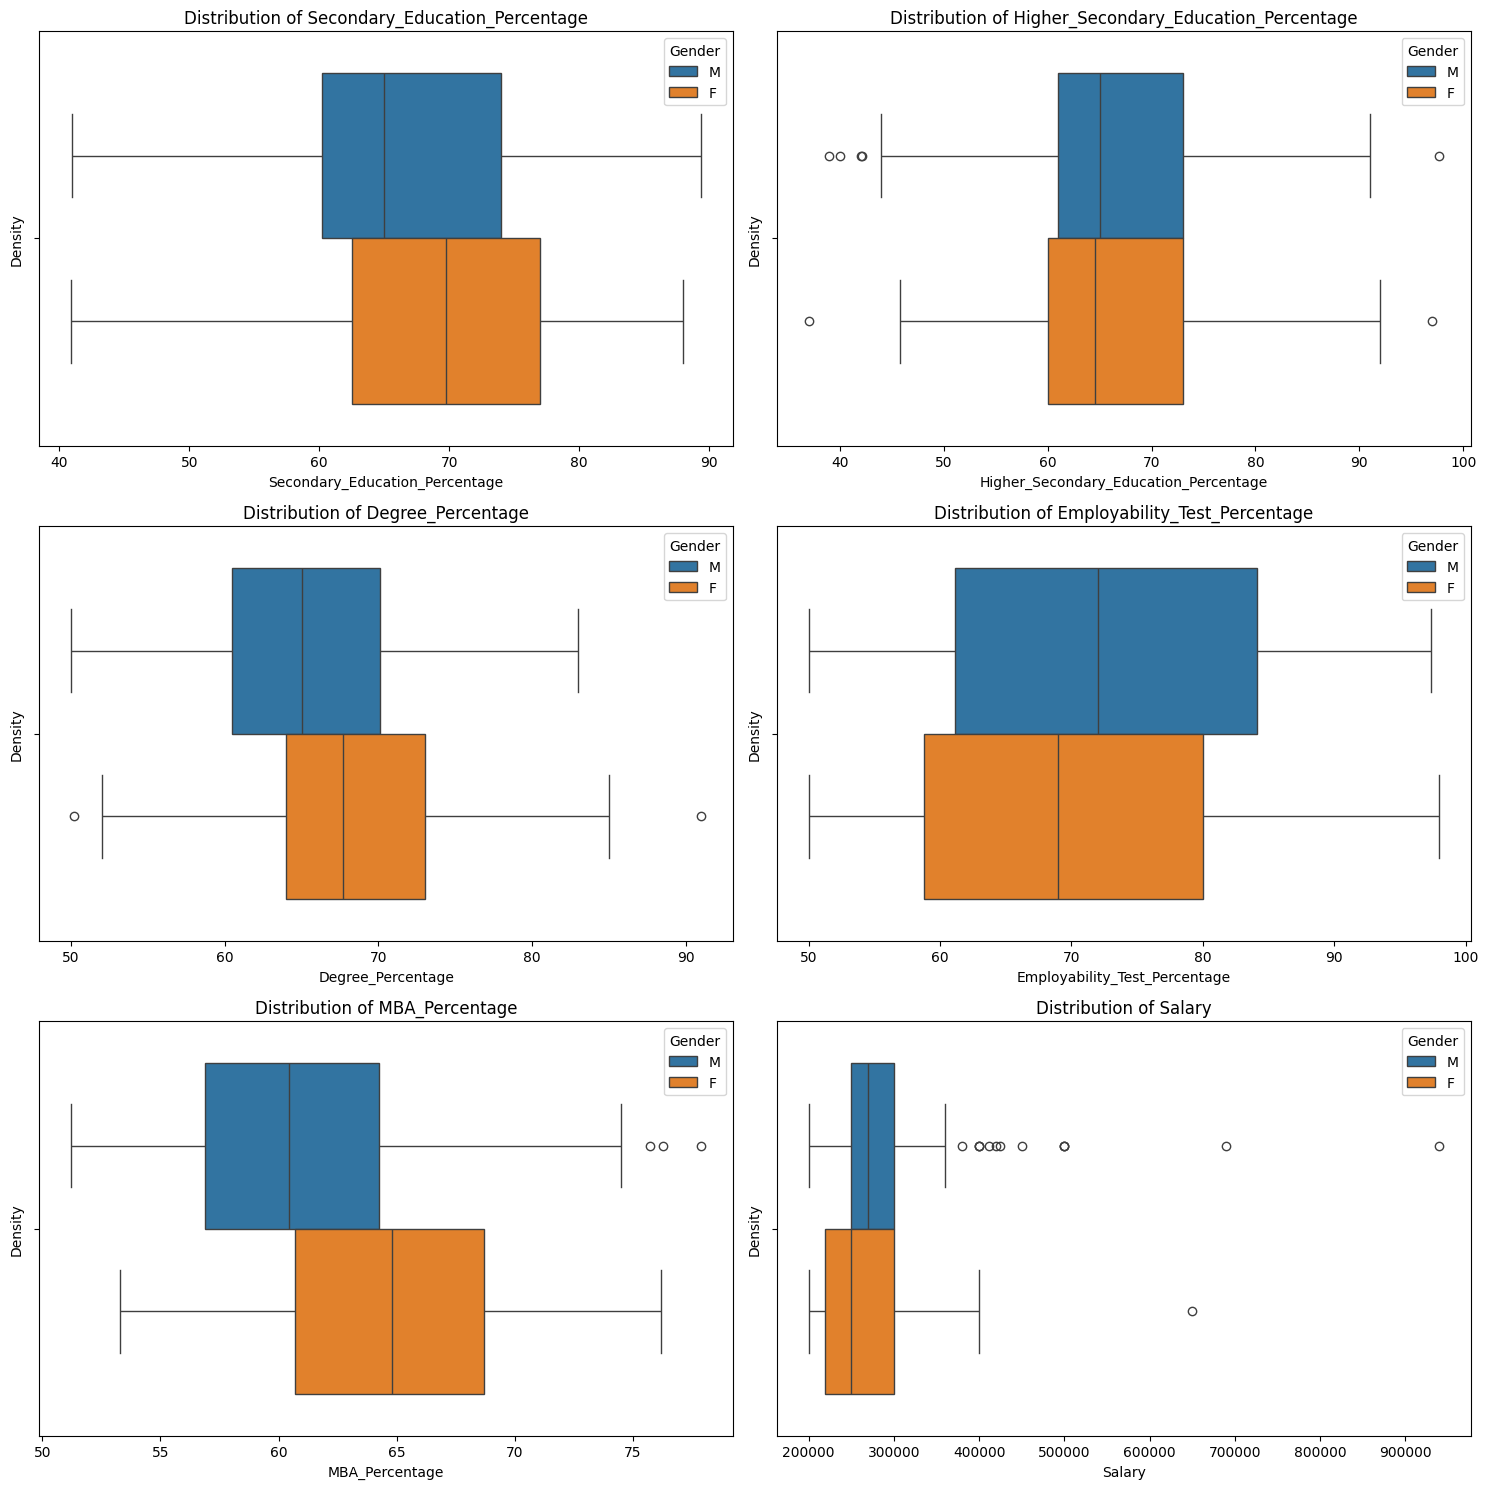

In [ ]:


fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

for ax, col in zip(axes.flatten(), df.select_dtypes(exclude=['object']).columns):
    sns.boxplot(data=df, x=col,  hue="Gender", ax=ax, )
    ax.set_title(f"Distribution of {col}")
    ax.set_ylabel("Density")

plt.tight_layout()
plt.show()

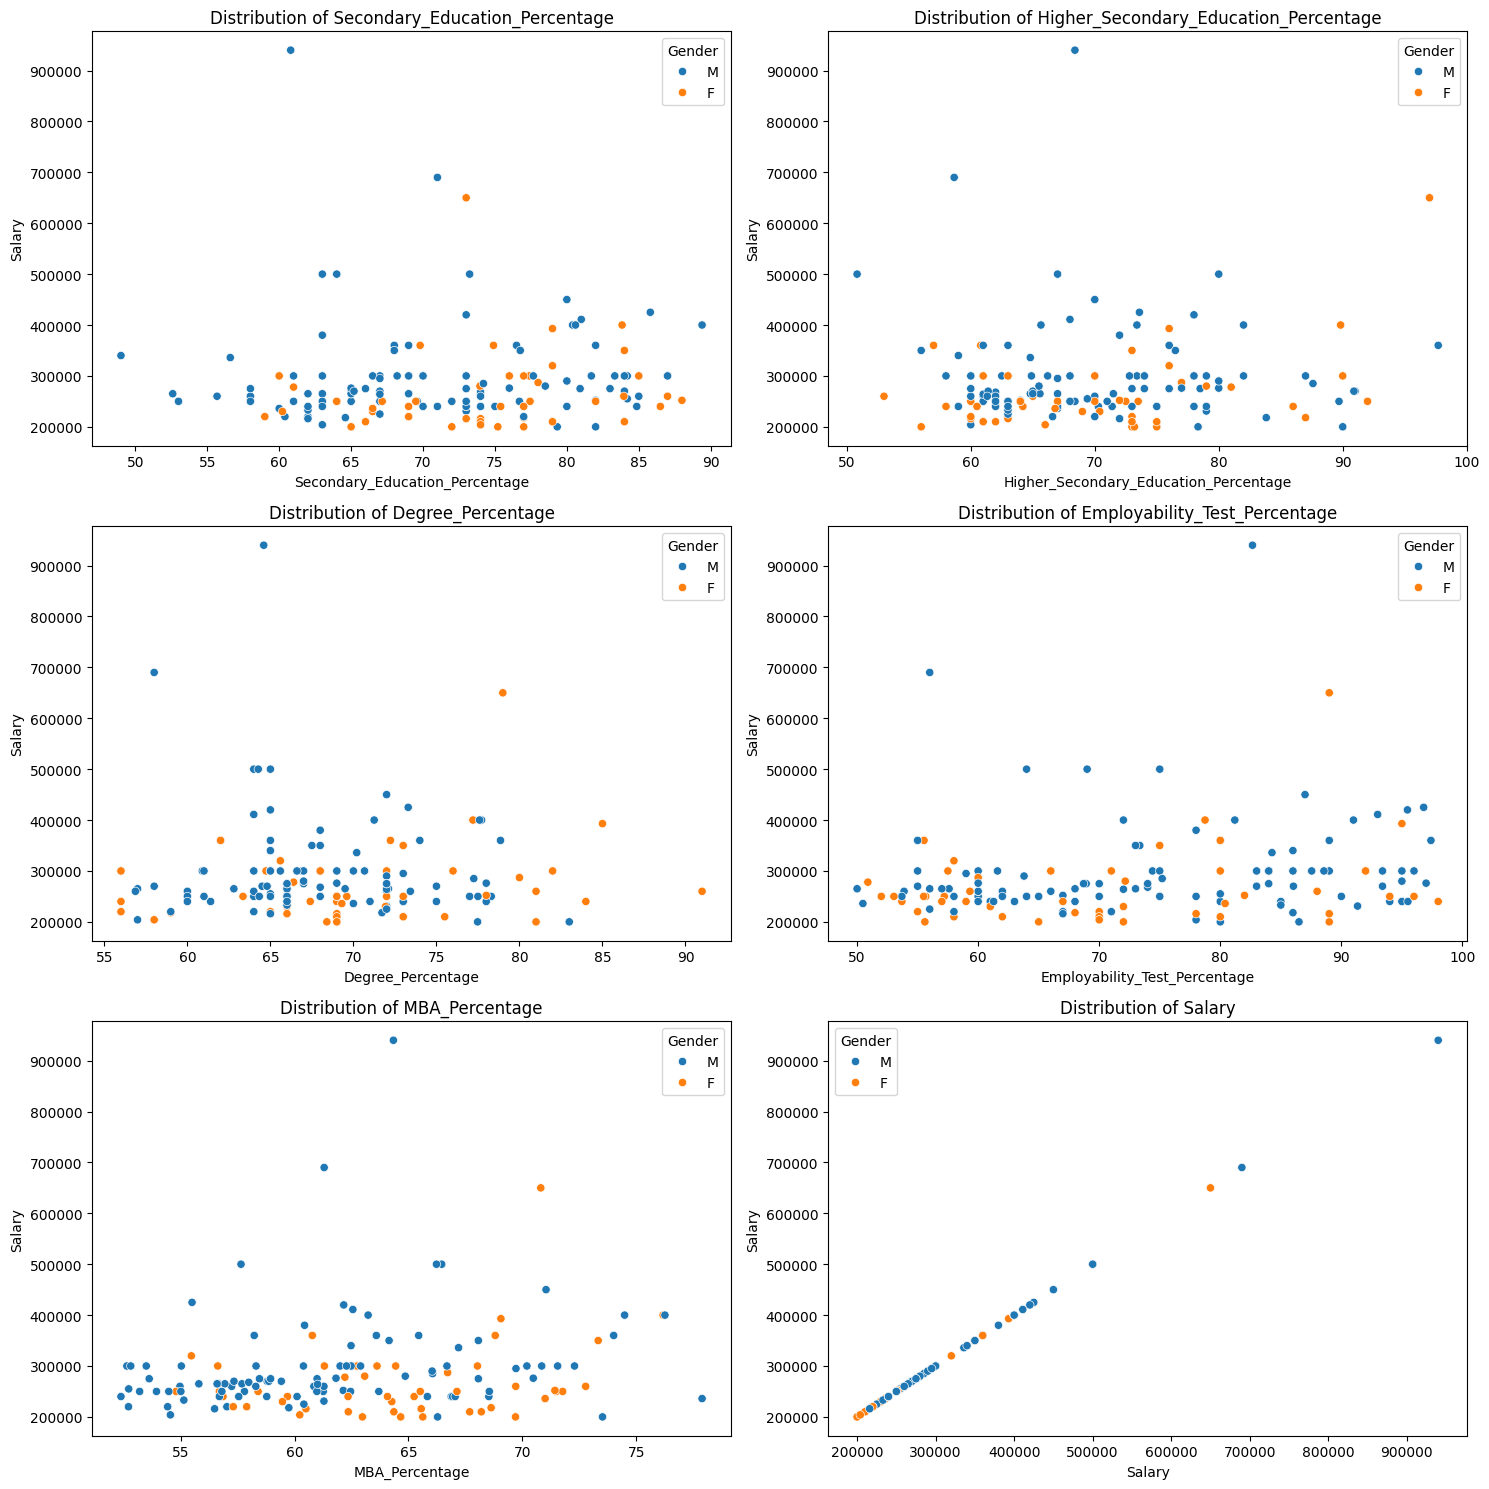

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

for ax, col in zip(axes.flatten(), df.select_dtypes(exclude=['object']).columns):
    sns.scatterplot(data=df, x=col, y="Salary", hue="Gender", ax=ax, )
    ax.set_title(f"Distribution of {col}")
    

plt.tight_layout()
plt.show()